# FinOptix

# FAC Summer Project 2025

# Fama-French 3 Factor Model

The Fama-French Three-Factor Model is a widely used tool in finance to analyze the performance of stocks and portfolios. It decomposes the returns of a stock or portfolio into three factors: market excess returns, company size, and value by conducting an Ordinary Least Squares (OLS) regression analysis .

The Fama-French Factor Model is a way to determine what factors influence returns. Returns could be the return of a single stock, a portfolio of multiple stocks or a specific index such as the SP500. It can be applied to individual stocks, portfolios of stocks, mutual funds, or any other type of investment that can be compared to the broader market.

Originally, the model started with three factors, also known as the Fama-French three-factor model. These factors are:

- Market excess returns (Mkt-RF): The return of the SP500 index minus the risk-free rate. This factor captures the overall market movement.
- Size factor (SMB, Small Minus Big): The return of small-cap stocks minus the return of large-cap stocks. This factor captures the outperformance of small-cap stocks over large-cap stocks.
- Value factor (HML, High Minus Low): The return of value stocks minus the return of growth stocks. This factor captures the outperformance of value stocks over growth stocks.

In order to determine the sentivity and explanatory power of each factor on the portfolio's return, a simple linear regression model is used.

F-F Research Data Factors Link -> https://drive.google.com/file/d/1IKrtOS3ePEJ_WLovEP1KMdq8nD_qmJ6a/view?usp=sharing

# Importing Libraries and Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import yfinance as yf
from scipy.optimize import minimize
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

style.use("default")

params = {
    "axes.labelsize": 8, "font.size": 8, "legend.fontsize": 8,
    "xtick.labelsize": 8, "ytick.labelsize": 8, "text.usetex": False,
    "font.family": "sans-serif", "axes.spines.top": False, "axes.spines.right": False,
    "grid.color": "grey", "axes.grid": True,  "grid.alpha": 0.5, "grid.linestyle": ":",
}

plt.rcParams.update(params)

In [2]:
tickers = [
    "AAPL", "MSFT", "AMZN", "NVDA", "GOOGL", "TSLA", "BRK-B", "JNJ", "WMT", "JPM",
    "V", "PG", "UNH", "HD", "BAC", "MA", "DIS", "XOM", "KO", "PFE",
    "CVX", "MRK", "PEP", "ABBV", "TMO", "LLY", "AVGO", "CSCO", "COST", "DHR",
    "ACN", "MCD", "NKE", "WFC", "NEE", "INTC", "TXN", "LIN", "MDT", "HON",
    "LOW", "PM", "IBM", "UPS", "QCOM", "AMGN", "ORCL", "RTX", "NFLX", "BA"
]
# tickers=["AAPL","MSFT","AMZN","NVDA","JNJ","PFE","UNH","JPM","BAC","MS","GS","TSLA","HD","PG","KO","PEP"]

# tickers=["MSFT","AMZN","AAPL","NVDA","BRK-B","GS","MS","NAT","BAC","DPZ","DIS","KO","MCD","COST","SBUX"]

portfolio_monthly=yf.download(tickers,period="max",interval="1mo")["Close"].pct_change()*100
# portfolio_monthly=yf.download(tickers,start="2006-01-01",end="2023-12-31",interval="1mo")["Close"].pct_change()*100
portfolio_monthly.dropna(inplace=True)
portfolio_monthly.index = portfolio_monthly.index.strftime('%Y-%m')

portfolio_monthly.index = pd.to_datetime(portfolio_monthly.index).to_period("M")

portfolio_monthly

[*********************100%***********************]  50 of 50 completed


Ticker,AAPL,ABBV,ACN,AMGN,AMZN,AVGO,BA,BAC,BRK-B,COST,...,RTX,TMO,TSLA,TXN,UNH,UPS,V,WFC,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2013-02,-3.093345,1.824793,3.435805,7.126171,-0.463274,-4.333234,4.101776,-0.795092,5.395650,-1.026018,...,3.402966,2.301051,-7.144776,4.746802,-3.187824,4.237640,0.462289,1.436763,1.186546,-0.466786
2013-03,0.869903,10.455062,2.165136,12.581382,0.840050,4.967849,12.355614,8.557083,1.996861,5.038219,...,3.797722,3.644951,8.785529,3.049648,7.034628,4.706853,7.285819,5.444686,5.721985,1.268189
2013-04,0.027091,12.923000,7.200208,1.658430,-4.758151,-10.551479,6.476442,1.067294,2.034552,2.186445,...,-2.290478,5.681885,42.491410,2.057508,5.160990,-0.069833,-0.812525,2.676380,4.532161,-1.242947
2013-05,1.569637,-6.438447,1.905828,-3.531389,6.063589,18.053801,8.325114,10.966690,7.289315,1.106663,...,3.954413,9.444744,81.070575,-0.053471,4.505277,0.069881,5.746152,6.766728,-3.705613,1.663151
2013-06,-11.245707,-3.162306,-12.361472,-1.426705,3.153785,-0.927628,3.985888,-5.856514,-1.884809,1.138923,...,-1.516072,-4.156310,9.819966,-2.951855,4.550521,1.381224,2.775932,2.576997,0.129323,0.558177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03,-8.049024,0.234419,-10.461978,1.949951,-10.373094,-16.045734,-2.336369,-9.479385,3.649067,-9.706657,...,0.105566,-5.928613,-11.543452,-8.311652,10.272457,-6.272114,-3.214777,-7.885050,-10.972518,7.782085
2025-04,-4.335298,-6.882401,-4.130887,-6.621729,-3.069482,15.303364,7.440635,-3.830163,0.125799,5.151298,...,-4.778815,-13.713268,8.874826,-10.934894,-21.107719,-13.355755,-1.415276,-1.086499,11.079909,-11.183046
2025-05,-5.482356,-3.726326,6.431911,-0.941842,11.164731,25.770252,13.141236,10.656970,-5.492735,4.593268,...,8.205816,-6.102564,22.788484,15.220233,-26.621140,2.350464,5.698986,5.309108,1.511575,-3.152510


# Calculate the Fama-French Factors


F-F Research Factors Data Link -> https://drive.google.com/file/d/1IKrtOS3ePEJ_WLovEP1KMdq8nD_qmJ6a/view?usp=sharing

In [8]:
ff_factors_monthly =pd.read_csv("/content/F-F_Research_Data_Factors.csv",index_col=0)
ff_factors_monthly.index.names=["Date"]
ff_factors_monthly.index=pd.to_datetime(ff_factors_monthly.index,format="%Y%m")
ff_factors_monthly.index=ff_factors_monthly.index.to_period("M")
ff_factors_monthly

,Mkt-RF,SMB,HML,RF
Date,,,,
1926-07,2.96,-2.56,-2.43,0.22
1926-08,2.64,-1.17,3.82,0.25
1926-09,0.36,-1.40,0.13,0.23
1926-10,-3.24,-0.09,0.70,0.32
1926-11,2.53,-0.10,-0.51,0.31
...,...,...,...,...
2024-03,2.83,-2.51,4.21,0.43
2024-04,-4.67,-2.39,-0.52,0.47
2024-05,4.34,0.78,-1.66,0.44


In [9]:
# Filter factor dates to match the asset
ff_factors_subset=ff_factors_monthly[ff_factors_monthly.index.isin(portfolio_monthly.index)].copy()

# Calculate returns for the asset

ff_factors_subset=pd.concat([ff_factors_subset,portfolio_monthly],axis=1)
ff_factors_subset.dropna(inplace=True)

ff_factors_subset

,Mkt-RF,SMB,HML,RF,AAPL,ABBV,ACN,AMGN,AMZN,AVGO,...,RTX,TMO,TSLA,TXN,UNH,UPS,V,WFC,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2013-02,1.29,-0.27,0.11,0.00,-3.093345,1.824793,3.435805,7.126171,-0.463274,-4.333234,...,3.402966,2.301051,-7.144776,4.746802,-3.187824,4.237640,0.462289,1.436763,1.186546,-0.466786
2013-03,4.03,0.81,-0.19,0.00,0.869903,10.455062,2.165136,12.581382,0.840050,4.967849,...,3.797722,3.644951,8.785529,3.049648,7.034628,4.706853,7.285819,5.444686,5.721985,1.268189
2013-04,1.55,-2.37,0.45,0.00,0.027091,12.923000,7.200208,1.658430,-4.758151,-10.551479,...,-2.290478,5.681885,42.491410,2.057508,5.160990,-0.069833,-0.812525,2.676380,4.532161,-1.242947
2013-05,2.80,1.71,2.63,0.00,1.569637,-6.438447,1.905828,-3.531389,6.063589,18.053801,...,3.954413,9.444744,81.070575,-0.053471,4.505277,0.069881,5.746152,6.766728,-3.705613,1.663151
2013-06,-1.20,1.33,0.03,0.00,-11.245707,-3.162306,-12.361472,-1.426705,3.153785,-0.927628,...,-1.516072,-4.156310,9.819966,-2.951855,4.550521,1.381224,2.775932,2.576997,0.129323,0.558177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03,2.83,-2.51,4.21,0.43,-5.007579,3.436532,-7.516423,4.642533,2.047981,1.916203,...,9.481514,1.934483,-12.923524,4.111647,0.222865,1.373797,-1.075460,4.995678,2.661646,12.246744
2024-04,-4.67,-2.39,-0.52,0.47,-0.670632,-10.686440,-13.184832,-3.650818,-2.982595,-1.478960,...,4.091042,-2.084608,4.260769,1.268576,-1.838129,-0.773738,-3.751605,2.346455,-1.026866,1.746384
2024-05,4.34,0.78,-1.66,0.44,12.869143,0.065074,-5.824673,11.648537,0.822859,2.174915,...,6.195813,-0.130122,-2.837187,10.537349,2.412644,-5.797390,1.433317,1.011453,10.800334,-0.853975


# Regression Model (Fama French 3 factor model)


In [10]:
rf=ff_factors_subset['RF']/100
returns=ff_factors_subset.iloc[:,4:]/100 # Dataframe of Returns for each stock
market=ff_factors_subset['Mkt-RF']/100 # Market return
smb=ff_factors_subset['SMB']/100 # SMB factor
hml=ff_factors_subset['HML']/100 # HML factor

In [11]:
print(returns.isna().sum())
print(market.isna().sum())
print(smb.isna().sum())
print(hml.isna().sum())
print(rf.isna().sum())

AAPL     0
ABBV     0
ACN      0
AMGN     0
AMZN     0
AVGO     0
BA       0
BAC      0
BRK-B    0
COST     0
CSCO     0
CVX      0
DHR      0
DIS      0
GOOGL    0
HD       0
HON      0
IBM      0
INTC     0
JNJ      0
JPM      0
KO       0
LIN      0
LLY      0
LOW      0
MA       0
MCD      0
MDT      0
MRK      0
MSFT     0
NEE      0
NFLX     0
NKE      0
NVDA     0
ORCL     0
PEP      0
PFE      0
PG       0
PM       0
QCOM     0
RTX      0
TMO      0
TSLA     0
TXN      0
UNH      0
UPS      0
V        0
WFC      0
WMT      0
XOM      0
dtype: int64
0
0
0
0


In [12]:
print(returns.shape, market.shape, smb.shape, hml.shape, rf.shape)

(138, 50) (138,) (138,) (138,) (138,)


In [13]:
# Fama-French regression

def fama_french_regression(returns,market,smb,hml,rf):
    X=sm.add_constant(pd.concat([market,smb,hml],axis=1))
    betas=[]
    for stock in returns.columns:
        Y=returns[stock]-rf
        model=sm.OLS(Y,X).fit()
        betas.append(model.params.values)
    betas_df=pd.DataFrame(betas,columns=['alpha','beta_mkt','beta_smb','beta_hml'],index=returns.columns)
    return betas_df,model

betas,model=fama_french_regression(returns,market,smb,hml,rf)

In [14]:
betas

,alpha,beta_mkt,beta_smb,beta_hml
AAPL,0.007955,1.250938,-0.266892,-0.520496
ABBV,0.009087,0.754001,0.002350,0.220758
ACN,0.000754,1.148768,-0.213472,-0.241999
AMGN,0.005370,0.727236,-0.205869,0.020113
AMZN,0.006405,1.326237,-0.248815,-0.952880
AVGO,0.020619,1.082522,0.035601,-0.276499
BA,-0.001069,1.373965,0.277836,0.435233
BAC,0.000364,1.321371,0.168435,0.996414
BRK-B,0.001554,0.886301,-0.498417,0.375019
COST,0.007871,0.813390,-0.245373,-0.437781


In [15]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     44.79
Date:                Sun, 06 Jul 2025   Prob (F-statistic):           4.09e-20
Time:                        15:41:59   Log-Likelihood:                 210.31
No. Observations:                 138   AIC:                            -412.6
Df Residuals:                     134   BIC:                            -400.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0008      0.005     -0.179      0.8

### So  now we can see the risk involved with investing in these firms by looking at its coefficients and draw the plot 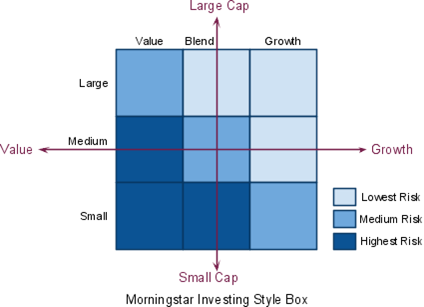

Plots

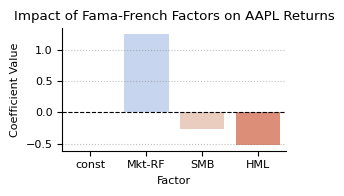

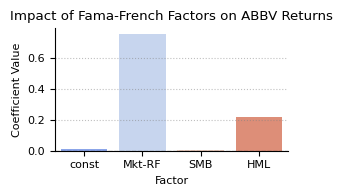

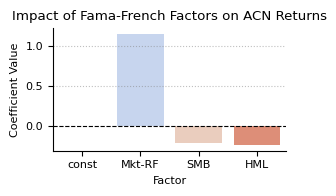

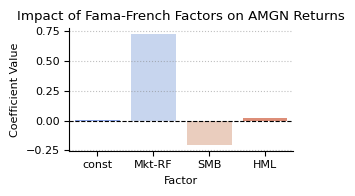

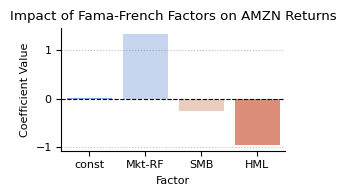

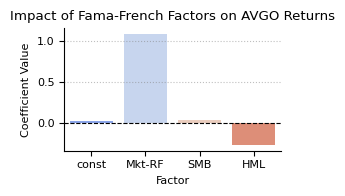

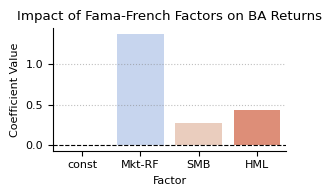

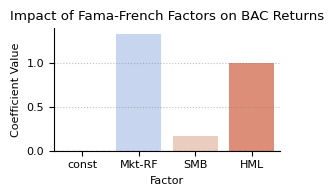

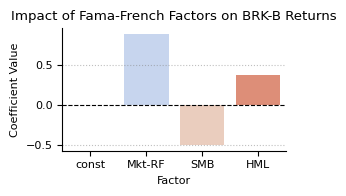

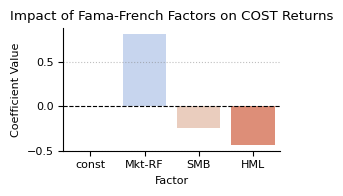

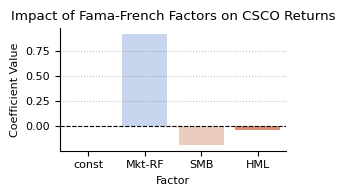

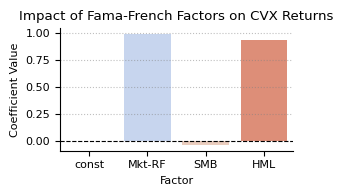

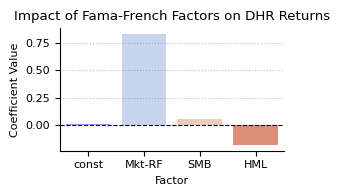

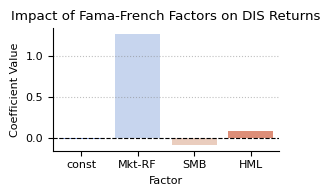

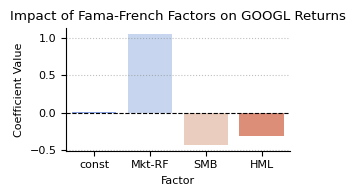

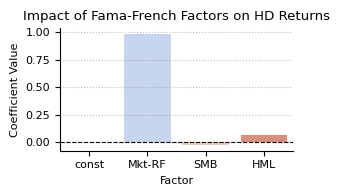

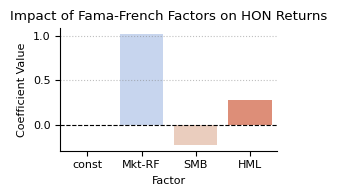

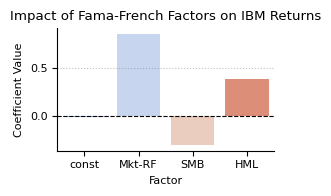

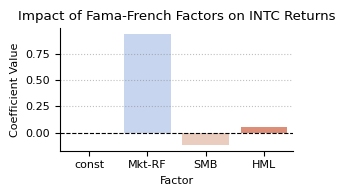

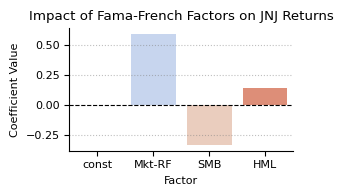

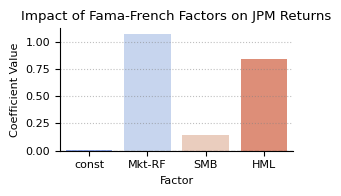

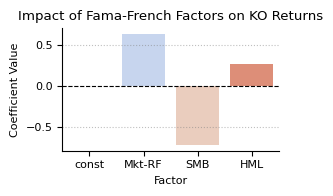

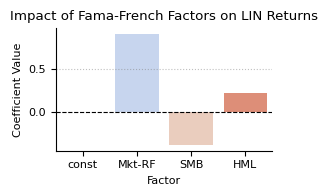

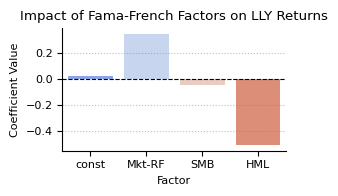

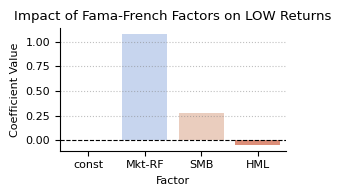

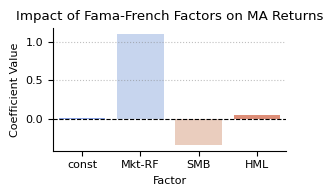

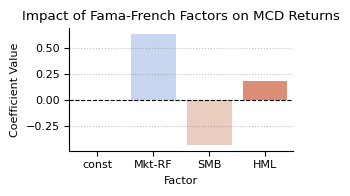

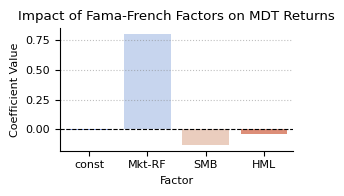

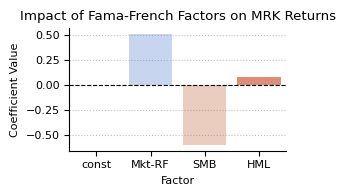

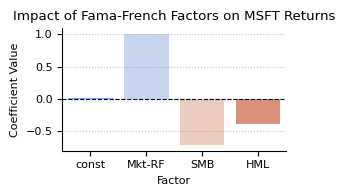

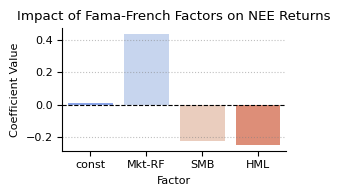

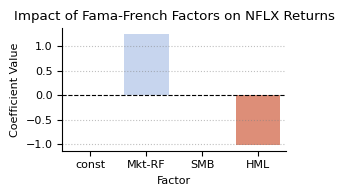

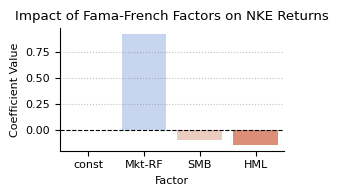

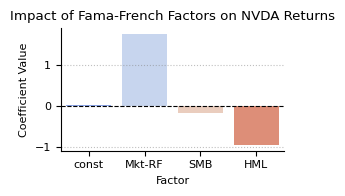

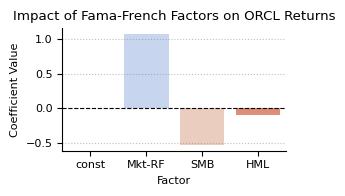

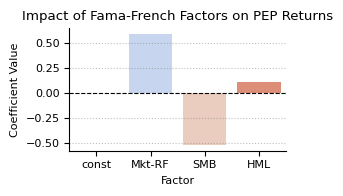

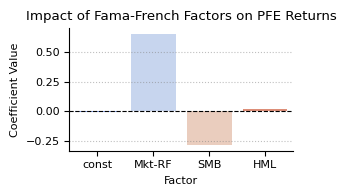

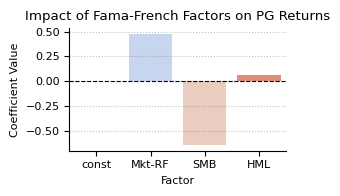

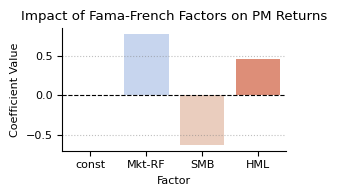

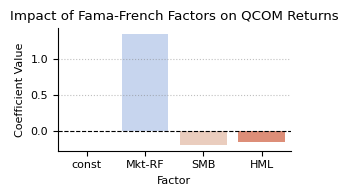

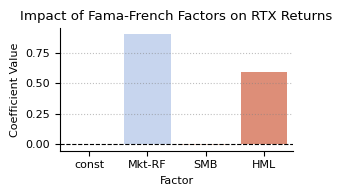

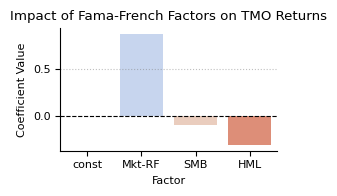

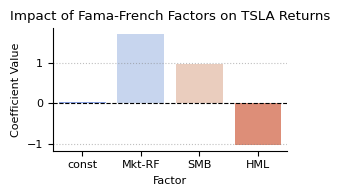

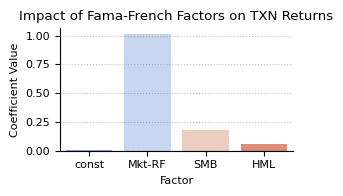

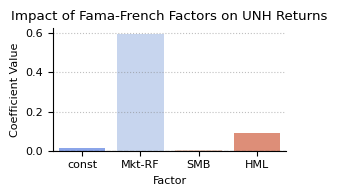

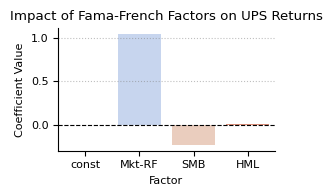

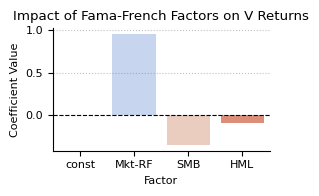

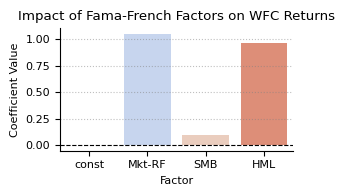

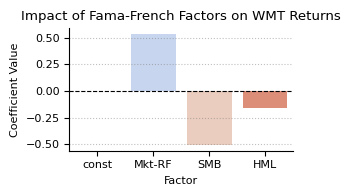

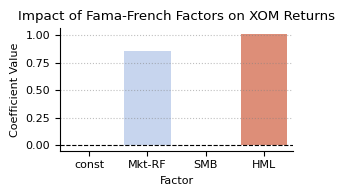

In [16]:
def fama_french_regression(returns, market, smb, hml, rf):
    X = sm.add_constant(pd.concat([market, smb, hml], axis=1))
    betas=[]
    models={}

    for stock in returns.columns:
        Y=returns[stock]-rf
        model=sm.OLS(Y,X).fit()
        betas.append(model.params.values)
        models[stock]=model  # Save the model for each stock

    return pd.DataFrame(betas,columns=['alpha','beta_mkt','beta_smb','beta_hml'],index=returns.columns),models

betas,models=fama_french_regression(returns,market,smb,hml,rf)

# Plotting for each stock
for stock in returns.columns:
    model=models[stock]

    # Data preparation for plotting
    factors=model.params.index
    coefficients=model.params.values
    confidence_intervals=model.conf_int().diff(axis=1).iloc[1]

    ols_data=pd.DataFrame({
        "Factor":factors,
        "Coefficient":coefficients,
        "Confidence_Lower":confidence_intervals[0],
        "Confidence_Upper":confidence_intervals[1],
    })

    # Plotting
    plt.figure(figsize=(3,2))  # Adjust figure size
    sns.barplot(x="Factor",y="Coefficient",data=ols_data,capsize=0.2,palette="coolwarm")

    # Adding the p-value for each factor to the plot
    # for i,row in ols_data.iterrows():
    #     plt.text(
    #         i,
    #         0.2,
    #         f"p-value:\n{model.pvalues[row['Factor']]:.4f}",
    #         ha="center",
    #         va="bottom",
    #         fontsize=6,
    #     )

    # Customize plot
    plt.title(f"Impact of Fama-French Factors on {stock} Returns")
    plt.xlabel("Factor")
    plt.ylabel("Coefficient Value")
    plt.axhline(0,color="black",linewidth=0.8,linestyle="--")

    # Show each plot
    plt.tight_layout()
    plt.show()
    print("\n")